In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import math
warnings.filterwarnings("ignore")
Inc=pd.read_csv(r"C:\Users\Abhishek\Desktop\python datasets\adult income1.csv") 
Inc

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,native.country,income
0,17,Private,148522,11th,7,Never-married,occupation,Own-child,White,Male,United-States,<=50K
1,17,Private,93235,12th,8,Never-married,occupation,Own-child,White,Female,United-States,<=50K
2,17,Private,184924,9th,5,Never-married,occupation,Own-child,White,Male,United-States,<=50K
3,17,Private,116626,11th,7,Never-married,occupation,Own-child,White,Male,United-States,<=50K
4,17,Private,209949,11th,7,Never-married,occupation,Own-child,White,Female,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...
31942,90,?,175444,7th-8th,4,Separated,?,Not-in-family,White,Female,United-States,<=50K
31943,90,Federal-gov,195433,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States,<=50K
31944,90,Private,47929,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,<=50K
31945,90,?,313986,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,United-States,>50K


In [2]:
Inc.head(15)            #check the top 5 rows of the Dataset

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,native.country,income
0,17,Private,148522,11th,7,Never-married,occupation,Own-child,White,Male,United-States,<=50K
1,17,Private,93235,12th,8,Never-married,occupation,Own-child,White,Female,United-States,<=50K
2,17,Private,184924,9th,5,Never-married,occupation,Own-child,White,Male,United-States,<=50K
3,17,Private,116626,11th,7,Never-married,occupation,Own-child,White,Male,United-States,<=50K
4,17,Private,209949,11th,7,Never-married,occupation,Own-child,White,Female,United-States,<=50K
5,17,Private,225106,10th,6,Never-married,occupation,Own-child,White,Female,United-States,<=50K
6,17,Local-gov,170916,10th,6,Never-married,occupation,Own-child,White,Female,United-States,<=50K
7,17,Federal-gov,99893,11th,7,Never-married,occupation,Not-in-family,Black,Female,United-States,<=50K
8,17,Private,218361,10th,6,Never-married,occupation,Own-child,White,Female,United-States,<=50K
9,17,Private,132680,10th,6,Never-married,occupation,Own-child,White,Female,United-States,<=50K


In [3]:
Inc.shape                         #Checking Dataset shape

(31947, 12)

In [4]:
Inc.relationship.value_counts()

Husband           12932
Not-in-family      8154
Own-child          4994
Unmarried          3384
Wife               1532
Other-relative      951
Name: relationship, dtype: int64

In [5]:
Inc.sex.value_counts()

Male      21349
Female    10598
Name: sex, dtype: int64

# Data Cleaning process

In [6]:
Inc.isnull().sum()                     #check how many null values are present in Dataset

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
native.country    0
income            0
dtype: int64

In [7]:
Inc.dtypes                             #Check how many columns are numerical & how many categorical

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
native.country    object
income            object
dtype: object

In [8]:
Inc.columns                             #checking columns in Dataset       

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'native.country', 'income'],
      dtype='object')

In [9]:
Inc.rename(columns={'marital.status':'marital_status'},inplace=True)
Inc.rename(columns={'native.country':'native_country'},inplace=True)

In [10]:
Inc.native_country.value_counts()

United-States                 29120
Mexico                          642
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     105
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            78
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           50
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                           29
Greece                      

In [11]:
from sklearn.preprocessing import LabelEncoder            #import labelencoder for dtype conversion
le=LabelEncoder()

In [12]:
Inc.workclass=le.fit_transform(Inc.workclass)
Inc.education=le.fit_transform(Inc.education)
Inc.marital_status=le.fit_transform(Inc.marital_status)
Inc.occupation=le.fit_transform(Inc.occupation)
Inc.relationship=le.fit_transform(Inc.relationship)
Inc.race=le.fit_transform(Inc.race)
Inc.sex=le.fit_transform(Inc.sex)
Inc.native_country=le.fit_transform(Inc.native_country)
Inc.income=le.fit_transform(Inc.income)


In [13]:
Inc.dtypes

age               int64
workclass         int32
fnlwgt            int64
education         int32
education.num     int64
marital_status    int32
occupation        int32
relationship      int32
race              int32
sex               int32
native_country    int32
income            int32
dtype: object

In [14]:
Inc.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
31942    False
31943    False
31944    False
31945    False
31946    False
Length: 31947, dtype: bool

Data is cleaned as now there is no null values,no columns are object & no duplicates value exist

# Base Models After Cleaning

In [15]:
data_x=Inc.iloc[:,:-1]
data_x.head(2)

,age,workclass,fnlwgt,education,education.num,marital_status,occupation,relationship,race,sex,native_country
0,17,4,148522,1,7,4,15,3,4,1,39
1,17,4,93235,2,8,4,15,3,4,0,39


In [16]:
data_y=Inc.iloc[:,11]
data_y.head(2)

0    0
1    0
Name: income, dtype: int32

In [17]:
import sklearn 
from sklearn.model_selection import train_test_split

In [18]:
d_x_train,d_x_test,d_y_train,d_y_test=train_test_split(data_x,data_y,test_size=0.2,random_state=101)

In [19]:
d_x_train.shape,d_x_test.shape,d_y_train.shape,d_y_test.shape

((25557, 11), (6390, 11), (25557,), (6390,))

# Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()

In [21]:
lg.fit(d_x_train,d_y_train)

LogisticRegression()

In [22]:
p1=lg.predict(d_x_test)

In [23]:
prob=lg.predict_proba(d_x_test)
prob

array([[0.63422544, 0.36577456],
       [0.79955095, 0.20044905],
       [0.73837712, 0.26162288],
       ...,
       [0.64694005, 0.35305995],
       [0.70864396, 0.29135604],
       [0.84836429, 0.15163571]])

In [24]:
from sklearn.metrics import confusion_matrix

In [25]:
m1=confusion_matrix(p1,d_y_test)
m1

array([[4867, 1523],
       [   0,    0]], dtype=int64)

In [26]:
lr_ac3=m1.diagonal().sum()/m1.sum()*100
lr_ac3

76.1658841940532

In [27]:
from sklearn.metrics import classification_report
print(classification_report(p1,d_y_test))

              precision    recall  f1-score   support

           0       1.00      0.76      0.86      6390
           1       0.00      0.00      0.00         0

    accuracy                           0.76      6390
   macro avg       0.50      0.38      0.43      6390
weighted avg       1.00      0.76      0.86      6390



In [28]:
from sklearn.metrics import precision_score,recall_score,f1_score

lr_pre4 = precision_score(d_y_test,p1)
print('Precision: %f' % lr_pre4)
# recall: tp / (tp + fn)
lr_rec4 = recall_score(d_y_test, p1)
print('Recall: %f' % lr_rec4)
# f1: 2 tp / (2 tp + fp + fn)
lr_f1234 = f1_score(d_y_test, p1)
print('F1 score: %f' % lr_f1234)

Precision: 0.000000
Recall: 0.000000
F1 score: 0.000000


In [29]:
df1=pd.DataFrame(prob)
df1

,0,1
0,0.634225,0.365775
1,0.799551,0.200449
2,0.738377,0.261623
3,0.830144,0.169856
4,0.854197,0.145803
...,...,...
6385,0.737795,0.262205
6386,0.732880,0.267120
6387,0.646940,0.353060
6388,0.708644,0.291356


# Decision Tree model

In [30]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [31]:
dt.fit(d_x_train,d_y_train)

DecisionTreeClassifier()

In [32]:
dt_p=dt.predict(d_x_test)
dt_p

array([0, 0, 0, ..., 0, 0, 0])

In [33]:
dt.feature_importances_

array([0.16695675, 0.04486903, 0.30086205, 0.01539824, 0.13476233,
       0.0089522 , 0.08434465, 0.20721734, 0.0168661 , 0.00381867,
       0.01595263])

In [34]:
dt_cf=confusion_matrix(dt_p,d_y_test)
dt_cf

array([[4154,  721],
       [ 713,  802]], dtype=int64)

In [35]:
dt_acc3=dt_cf.diagonal().sum()/dt_cf.sum()*100
dt_acc3

77.55868544600939

In [36]:
print(classification_report(dt_p,d_y_test))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      4875
           1       0.53      0.53      0.53      1515

    accuracy                           0.78      6390
   macro avg       0.69      0.69      0.69      6390
weighted avg       0.78      0.78      0.78      6390



In [37]:
from sklearn.metrics import precision_score,recall_score,f1_score

dt_pre4 = precision_score(d_y_test,dt_p)
print('Precision: %f' % dt_pre4)
# recall: tp / (tp + fn)
dt_rec4 = recall_score(d_y_test, dt_p)
print('Recall: %f' % dt_rec4)
# f1: 2 tp / (2 tp + fp + fn)
dt_f1234 = f1_score(d_y_test, dt_p)
print('F1 score: %f' % dt_f1234)

Precision: 0.529373
Recall: 0.526592
F1 score: 0.527979


# Random Forest Model

In [38]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()

In [39]:
rf.fit(d_x_train,d_y_train)

RandomForestClassifier()

In [40]:
rf_p=rf.predict(d_x_test)
rf_p

array([0, 0, 0, ..., 1, 0, 0])

In [41]:
rf_cf=confusion_matrix(rf_p,d_y_test)
rf_cf

array([[4399,  676],
       [ 468,  847]], dtype=int64)

In [42]:
rf_acc3=rf_cf.diagonal().sum()/rf_cf.sum()*100
rf_acc3

82.09702660406886

In [43]:
print(classification_report(rf_p,d_y_test))

              precision    recall  f1-score   support

           0       0.90      0.87      0.88      5075
           1       0.56      0.64      0.60      1315

    accuracy                           0.82      6390
   macro avg       0.73      0.76      0.74      6390
weighted avg       0.83      0.82      0.83      6390



In [44]:
from sklearn.metrics import precision_score,recall_score,f1_score

rf_pre4 = precision_score(d_y_test,rf_p)
print('Precision: %f' % rf_pre4)
# recall: tp / (tp + fn)
rf_rec4 = recall_score(d_y_test, rf_p)
print('Recall: %f' % rf_rec4)
# f1: 2 tp / (2 tp + fp + fn)
rf_f1234 = f1_score(d_y_test, rf_p)
print('F1 score: %f' % rf_f1234)

Precision: 0.644106
Recall: 0.556139
F1 score: 0.596899


# KNN Model

In [45]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=25)

In [46]:
knn.fit(d_x_train,d_y_train)

KNeighborsClassifier(n_neighbors=25)

In [47]:
knn_p=knn.predict(d_x_test)
knn_p

array([0, 0, 0, ..., 0, 0, 0])

In [48]:
knn_cf=confusion_matrix(knn_p,d_y_test)
knn_cf

array([[4827, 1494],
       [  40,   29]], dtype=int64)

In [49]:
knn_ac3=knn_cf.diagonal().sum()/knn_cf.sum()*100
knn_ac3

75.99374021909233

In [50]:
print(classification_report(knn_p,d_y_test))

              precision    recall  f1-score   support

           0       0.99      0.76      0.86      6321
           1       0.02      0.42      0.04        69

    accuracy                           0.76      6390
   macro avg       0.51      0.59      0.45      6390
weighted avg       0.98      0.76      0.85      6390



# SVM Model

In [51]:
from sklearn.svm import SVC
svc=SVC()

In [52]:
svc.fit(d_x_train,d_y_train)

SVC()

In [53]:
sp=svc.predict(d_x_test)

In [54]:
svc_m=confusion_matrix(sp,d_y_test)
svc_m

array([[4867, 1523],
       [   0,    0]], dtype=int64)

In [55]:
svc_ac3=svc_m.diagonal().sum()/svc_m.sum()*100
svc_ac3

76.1658841940532

In [56]:
print(classification_report(sp,d_y_test))

              precision    recall  f1-score   support

           0       1.00      0.76      0.86      6390
           1       0.00      0.00      0.00         0

    accuracy                           0.76      6390
   macro avg       0.50      0.38      0.43      6390
weighted avg       1.00      0.76      0.86      6390



# XG Boost

In [57]:
from xgboost import XGBClassifier
xgb=XGBClassifier()

In [58]:
xgb.fit(d_x_train,d_y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [59]:
xgb_p=xgb.predict(d_x_test)

In [60]:
xgb_m=confusion_matrix(xgb_p,d_y_test)
xgb_m

array([[4500,  607],
       [ 367,  916]], dtype=int64)

In [61]:
xgb_ac3=xgb_m.diagonal().sum()/xgb_m.sum()*100
xgb_ac3

84.75743348982786

In [62]:
print(classification_report(xgb_p,d_y_test))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90      5107
           1       0.60      0.71      0.65      1283

    accuracy                           0.85      6390
   macro avg       0.76      0.80      0.78      6390
weighted avg       0.86      0.85      0.85      6390



In [63]:
from sklearn.metrics import precision_score,recall_score,f1_score

xgb_pre4 = precision_score(d_y_test,xgb_p)
print('Precision: %f' % xgb_pre4)
# recall: tp / (tp + fn)
xgb_rec4 = recall_score(d_y_test, xgb_p)
print('Recall: %f' % xgb_rec4)
# f1: 2 tp / (2 tp + fp + fn)
xgb_f1234 = f1_score(d_y_test, xgb_p)
print('F1 score: %f' % xgb_f1234)

Precision: 0.713952
Recall: 0.601445
F1 score: 0.652887


# EDA Process

<Axes: xlabel='education', ylabel='count'>

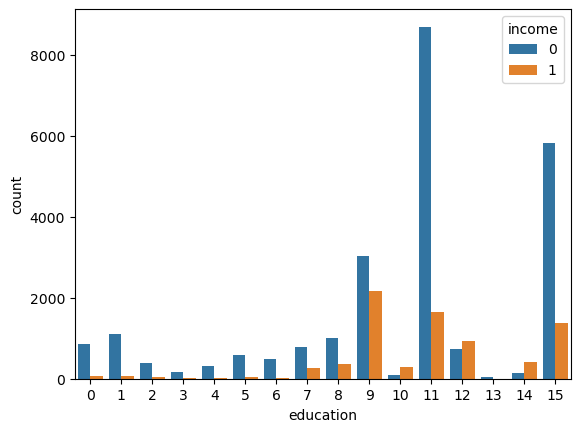

In [64]:
sns.countplot(x="education",data=Inc,hue='income')

From the above plot we can see the people who are HS Grad,some college & bachelors are more in numbers which having income less than 50k

<Axes: xlabel='workclass', ylabel='count'>

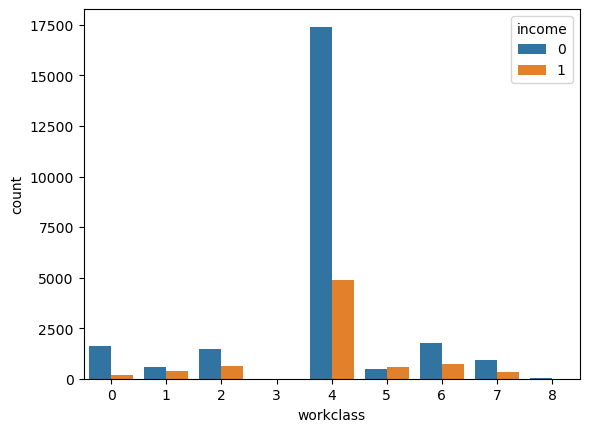

In [65]:
sns.countplot(x="workclass",data=Inc,hue='income')

from this plot we can clearly see private employees are more in numbers among all having income less than 50k per month

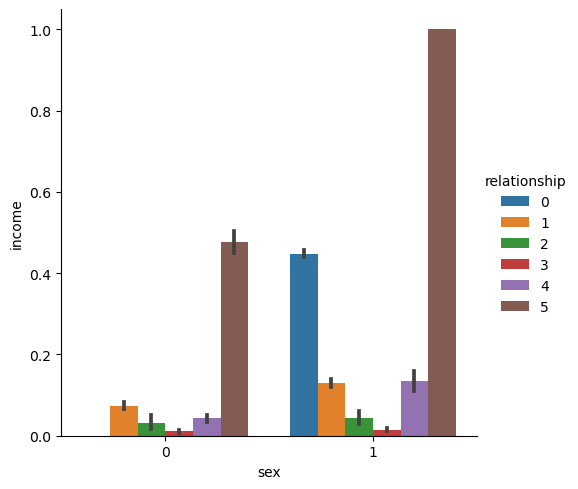

In [66]:

sns.catplot(x="sex",y="income",hue="relationship",kind="bar",data=Inc)


From this plot we can see Males having wife have higher income

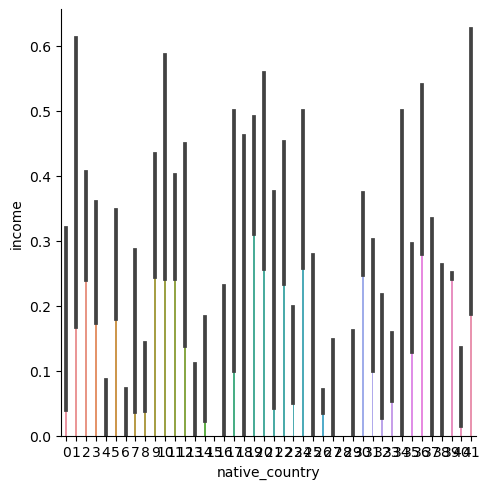

In [67]:

sns.catplot(x="native_country",y="income",kind="bar",data=Inc,width=0.2)


From this plot we can clearly see Country Combodia & Yugoslavia people have higher income than other country people.

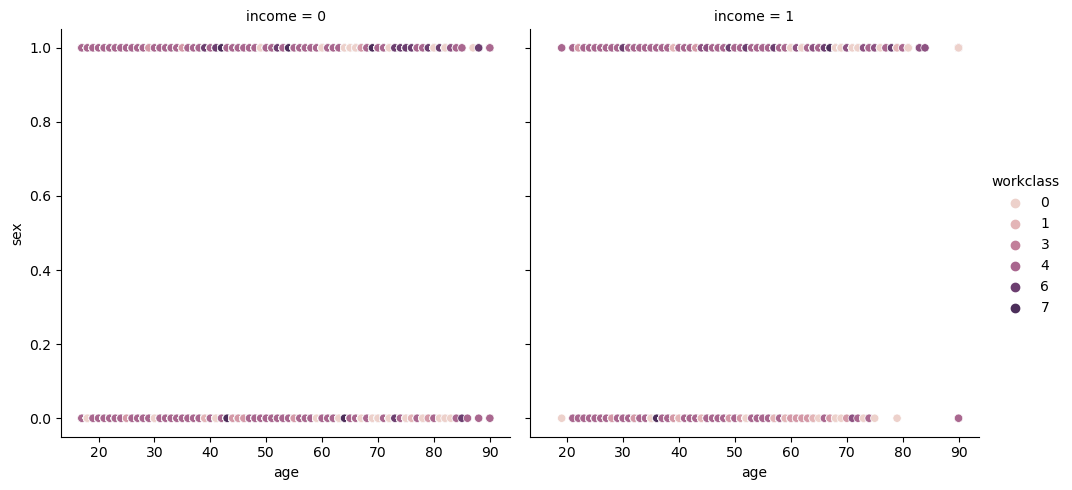

In [68]:
sns.relplot(data=Inc,x="age",y="sex",col="income",hue="workclass")

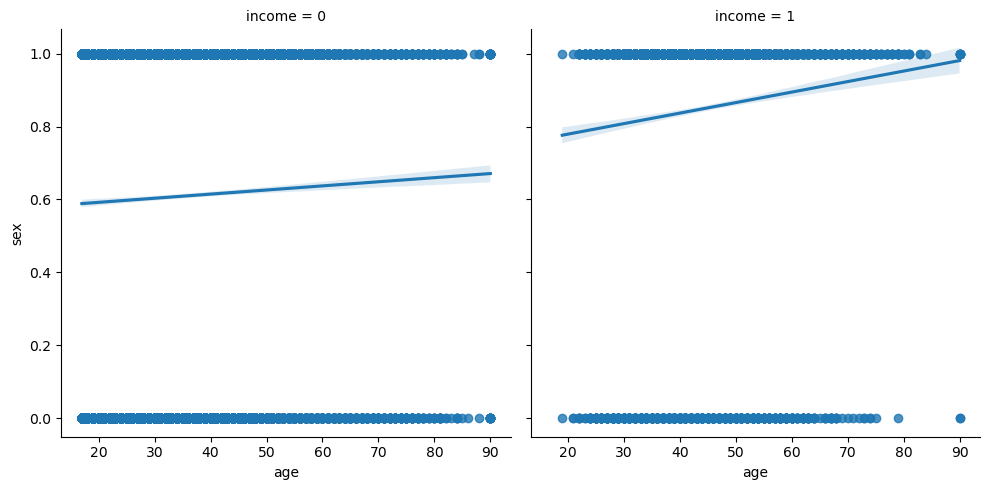

In [69]:
sns.lmplot(data=Inc,x="age",y="sex",col="income")

From this plot we can observed Male having private workclass with higher age having more income

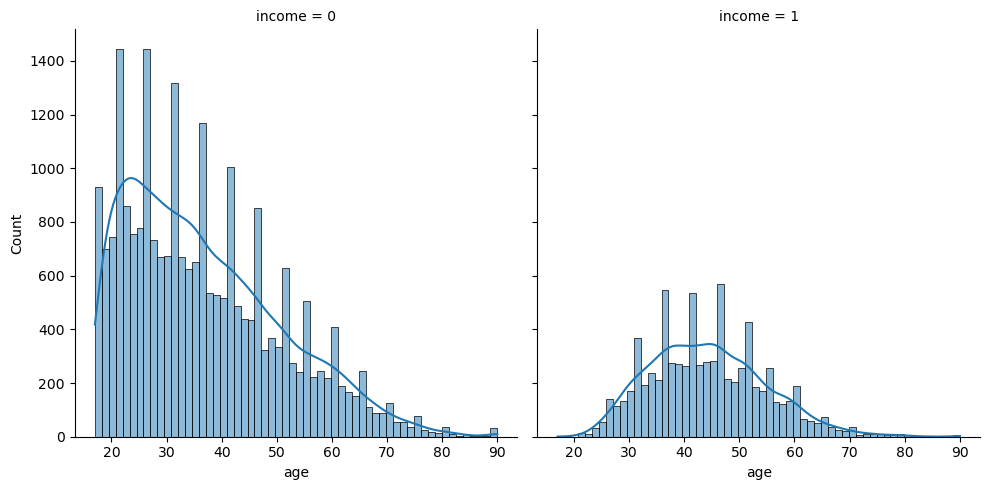

In [70]:
sns.displot(data=Inc,x="age",col="income",kde=True)

From this plot we can clearly see younger people have higher income than older ones in case of less than 50k per month

<Axes: xlabel='age', ylabel='Count'>

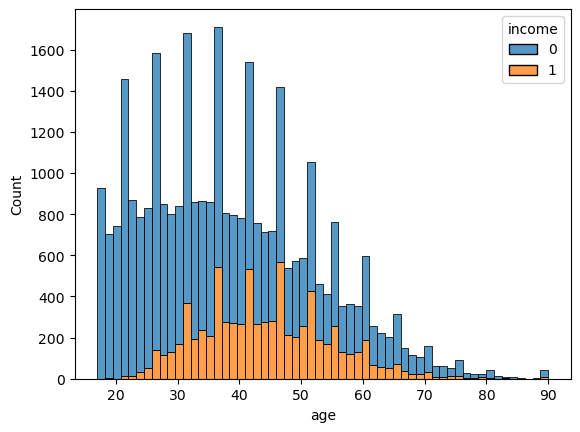

In [71]:
sns.histplot(data=Inc,x="age",hue="income",multiple="stack")

Here from this plot we can see who are Married-civ-spouse & never married having higher income than others

<Axes: xlabel='fnlwgt', ylabel='Density'>

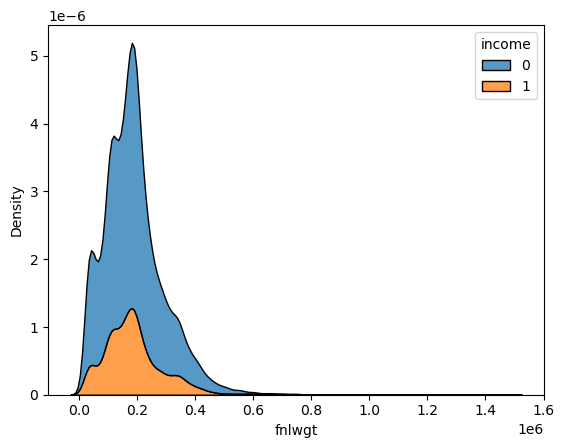

In [72]:
sns.kdeplot(data=Inc,x="fnlwgt",hue="income",multiple='stack')

From this above graph we can see density variation according to final weight

<Axes: xlabel='income', ylabel='marital_status'>

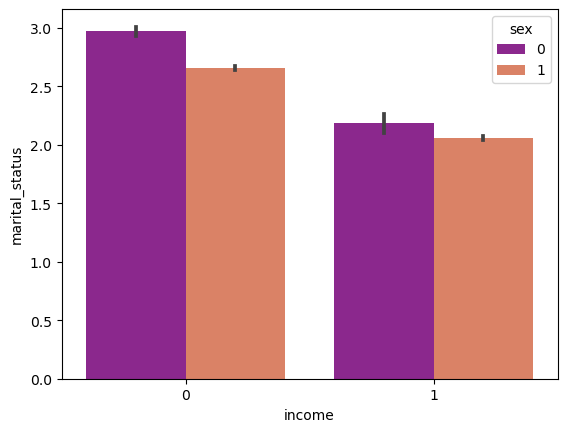

In [73]:
sns.barplot(x ='income', y ='marital_status',hue='sex', data = Inc, palette ='plasma')

From this plot we can see the no of people who never married & married have civ-spouse have income count high as compare to other & more no of people have <=50k monthly income 

# CLASS IMBALANCE ISSUE

In [74]:
Inc.income.value_counts()

0    24264
1     7683
Name: income, dtype: int64

<Axes: xlabel='income', ylabel='count'>

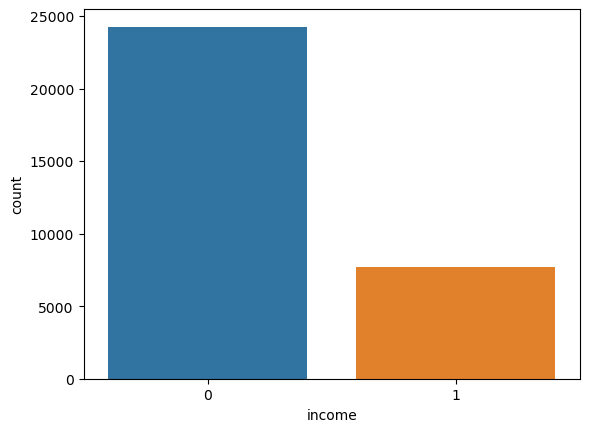

In [75]:
sns.countplot(x="income",data=Inc)

We can easily see from here model is biased & one sided towards 0 side more w.r.t 1

# Undersampling technique(Nearmiss)

In [76]:
from imblearn.under_sampling import NearMiss
nm=NearMiss()

In [77]:
x_nm,y_nm=nm.fit_resample(data_x,data_y)

In [78]:
x_nm.shape,y_nm.shape

((15366, 11), (15366,))

In [79]:
y_nm.value_counts()

0    7683
1    7683
Name: income, dtype: int64

In [80]:
xnm_tr,xnm_te,ynm_tr,ynm_te=train_test_split(x_nm,y_nm,test_size=0.2,random_state=100)

In [81]:
xnm_tr.shape,xnm_te.shape,ynm_tr.shape,ynm_te.shape

((12292, 11), (3074, 11), (12292,), (3074,))

# Undersampling technique(IMBlearn)

In [82]:
from imblearn.under_sampling import RandomUnderSampler

In [83]:
a1=RandomUnderSampler(sampling_strategy='all')

In [84]:
x2,y2=a1.fit_resample(data_x,data_y)

In [85]:
x2.shape,y2.shape

((15366, 11), (15366,))

In [86]:
xtr,xte,ytr,yte=train_test_split(x2,y2,test_size=0.2,random_state=100)

In [87]:
xtr.shape,xte.shape,ytr.shape,yte.shape

((12292, 11), (3074, 11), (12292,), (3074,))

# Oversampling technique(SMOTE)

In [88]:
from imblearn.over_sampling import SMOTE

In [89]:
smote=SMOTE()

In [90]:
x_smote,y_smote=smote.fit_resample(data_x,data_y)

In [91]:
x_smote.shape,y_smote.shape

((48528, 11), (48528,))

In [92]:
y_smote.value_counts()

0    24264
1    24264
Name: income, dtype: int64

In [93]:
xs_tr,xs_te,ys_tr,ys_te=train_test_split(x_smote,y_smote,test_size=0.2,random_state=100)

In [94]:
xs_tr.shape,xs_te.shape,ys_tr.shape,ys_te.shape

((38822, 11), (9706, 11), (38822,), (9706,))

# Check Correlation b/w columns

In [95]:
import  seaborn as sns
data_cor=Inc.corr()
data_cor

,age,workclass,fnlwgt,education,education.num,marital_status,occupation,relationship,race,sex,native_country,income
age,1.000000,0.004581,-0.076178,-0.009684,0.035951,-0.266191,-0.000467,-0.263814,0.026348,0.088590,-0.000454,0.233361
workclass,0.004581,1.000000,-0.017041,0.024945,0.052560,-0.063960,0.249871,-0.090751,0.051939,0.095382,0.008926,0.052262
fnlwgt,-0.076178,-0.017041,1.000000,-0.028461,-0.044539,0.028628,-0.004779,0.009992,-0.021793,0.025680,-0.063168,-0.008796
education,-0.009684,0.024945,-0.028461,1.000000,0.359348,-0.038595,-0.011977,-0.011541,0.014028,-0.026759,0.075606,0.080206
education.num,0.035951,0.052560,-0.044539,0.359348,1.000000,-0.068597,0.127527,-0.093851,0.034672,0.010850,0.087072,0.335477
marital_status,-0.266191,-0.063960,0.028628,-0.038595,-0.068597,1.000000,-0.023794,0.184222,-0.068628,-0.128412,-0.020744,-0.198068
occupation,-0.000467,0.249871,-0.004779,-0.011977,0.127527,-0.023794,1.000000,-0.091848,0.017384,0.091504,0.007662,0.122588
relationship,-0.263814,-0.090751,0.009992,-0.011541,-0.093851,0.184222,-0.091848,1.000000,-0.117755,-0.581325,-0.012410,-0.250853
race,0.026348,0.051939,-0.021793,0.014028,0.034672,-0.068628,0.017384,-0.117755,1.000000,0.090029,0.122493,0.072364
sex,0.088590,0.095382,0.025680,-0.026759,0.010850,-0.128412,0.091504,-0.581325,0.090029,1.000000,0.003350,0.216024


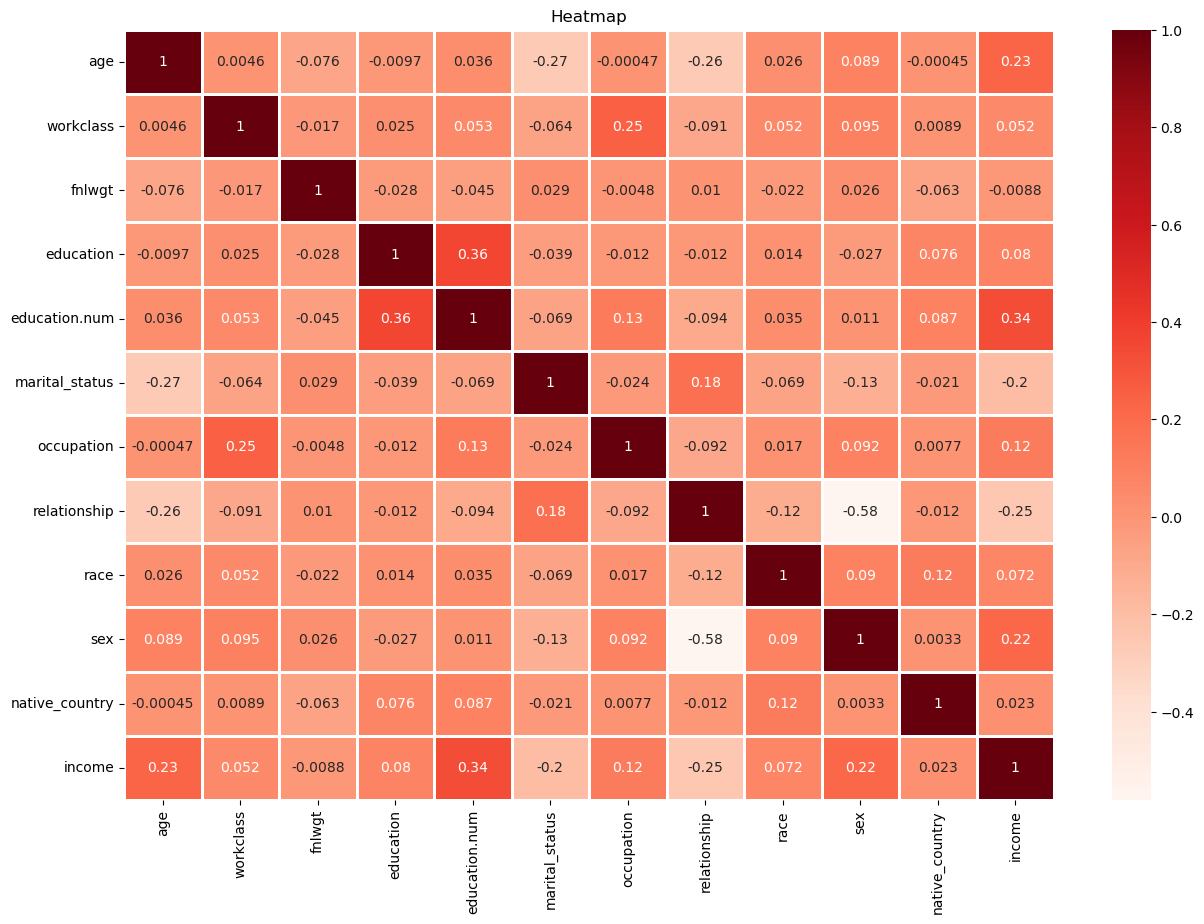

In [96]:
plt.figure(figsize=(15,10))
heatmap=sns.heatmap(data_cor,linewidth=1,annot=True,cmap=plt.cm.Reds)
plt.title("Heatmap")
plt.show()

# Outliers Treatment

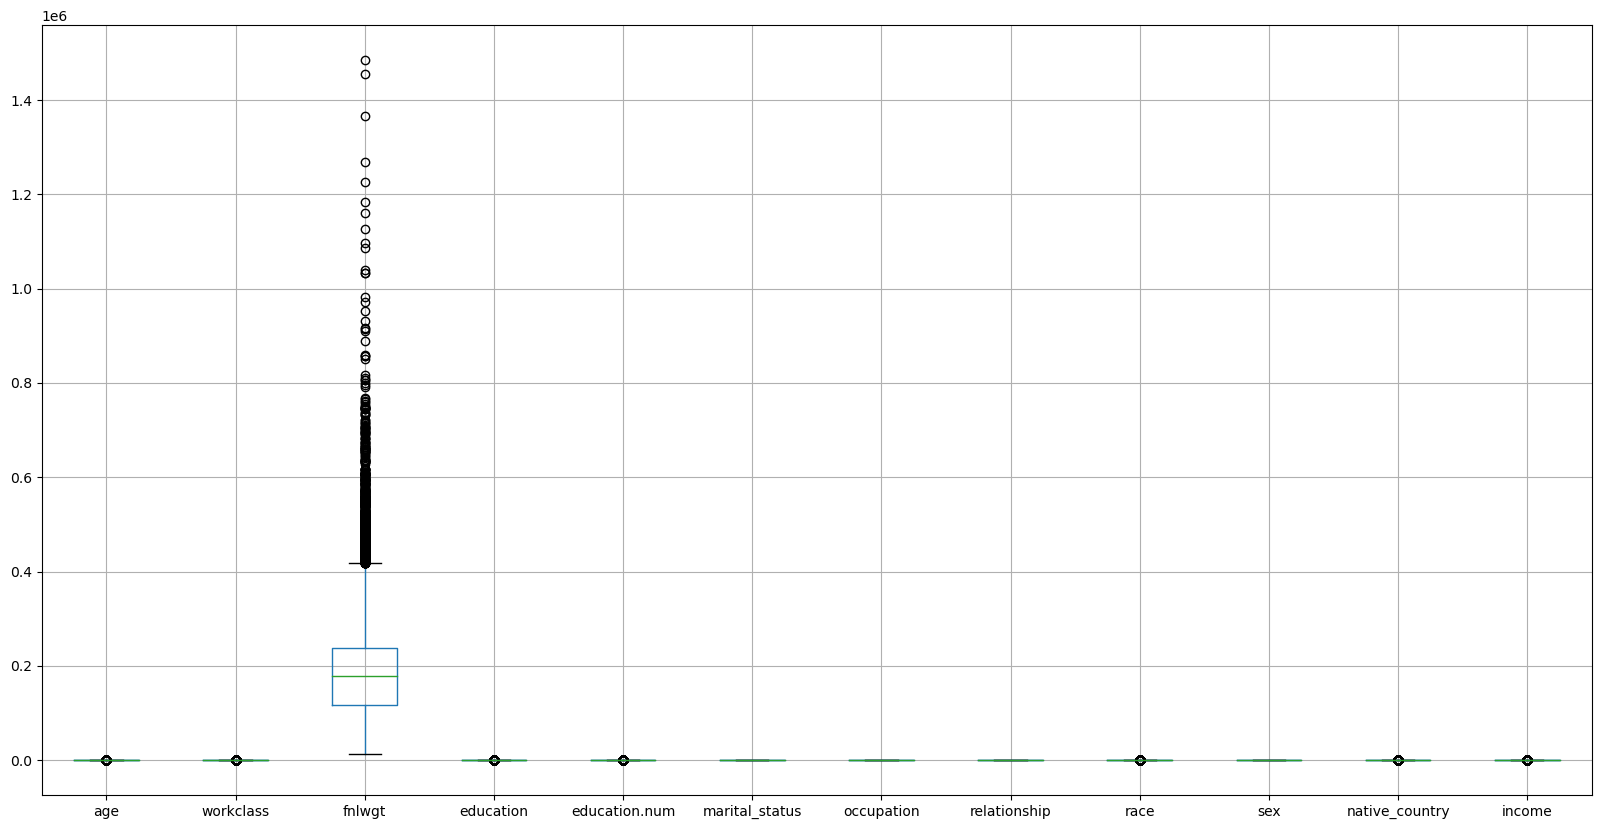

In [97]:
Inc.boxplot(figsize=(20,10))
plt.show()

<Axes: >

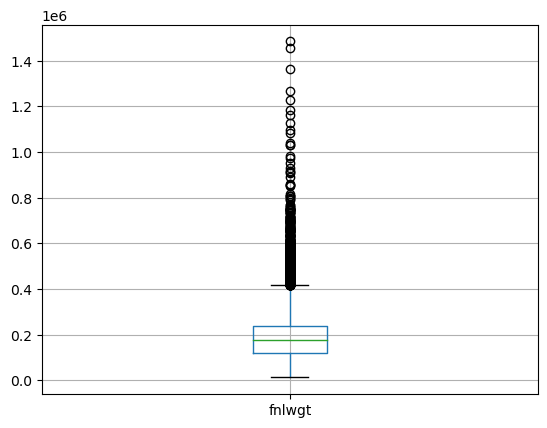

In [98]:
Inc.boxplot(column="fnlwgt")

<Axes: xlabel='fnlwgt', ylabel='Density'>

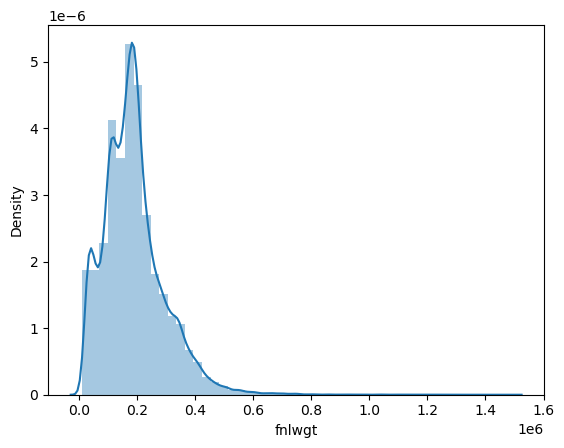

In [99]:
sns.distplot(Inc.fnlwgt)

In [100]:
Inc["fnlwgt"].describe()

count    3.194700e+04
mean     1.897319e+05
std      1.057567e+05
min      1.228500e+04
25%      1.176275e+05
50%      1.783120e+05
75%      2.374535e+05
max      1.484705e+06
Name: fnlwgt, dtype: float64

In [101]:
IQR=Inc.fnlwgt.quantile(0.75)-Inc.fnlwgt.quantile(0.25)
IQR

119826.0

In [102]:
ilb1=Inc["fnlwgt"].quantile(0.25)-(IQR*3)     # for extreme boundary instead of 1.5 we can take 3
iub1=Inc["fnlwgt"].quantile(0.75)+(IQR*3)
ilb1,iub1

(-241850.5, 596931.5)

In [103]:
Inc.loc[Inc["fnlwgt"]>596931.5,"fnlwgt"]=596931.5
Inc.loc[Inc["fnlwgt"]<-241850.5,"fnlwgt"]=-241850.5

In [104]:
Inc["fnlwgt"].describe()

count     31947.000000
mean     189075.136805
std      102080.907039
min       12285.000000
25%      117627.500000
50%      178312.000000
75%      237453.500000
max      596931.500000
Name: fnlwgt, dtype: float64

<Axes: xlabel='fnlwgt', ylabel='Density'>

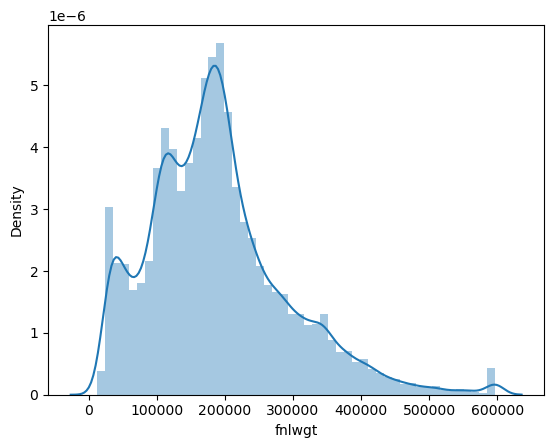

In [105]:
sns.distplot(Inc.fnlwgt)

<Axes: xlabel='fnlwgt', ylabel='Count'>

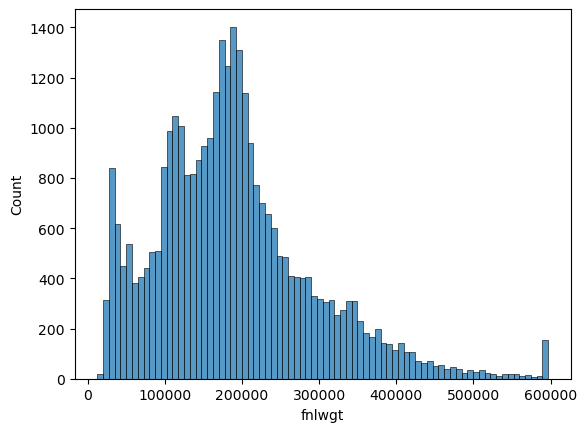

In [106]:
sns.histplot(Inc.fnlwgt)

# Check Skewness

In [107]:
Inc.skew()

age               0.557149
workclass        -0.745761
fnlwgt            0.946188
education        -0.936959
education.num    -0.308481
marital_status   -0.013242
occupation        0.143479
relationship      0.784843
race             -2.484849
sex              -0.714774
native_country   -4.179521
income            1.214464
dtype: float64

# Skewness treatment

As only categorical column has skewness so we do not do any process on treatment

# Ml Models after EDA,Feature engineering on Oversampled data

#Logistic Regression

In [108]:
lg.fit(xs_tr,ys_tr)

LogisticRegression()

In [109]:
p2=lg.predict(xs_te)

In [110]:
prob1=lg.predict_proba(xs_te)
prob1

array([[0.45529796, 0.54470204],
       [0.54874796, 0.45125204],
       [0.19001792, 0.80998208],
       ...,
       [0.22224618, 0.77775382],
       [0.40708422, 0.59291578],
       [0.41463726, 0.58536274]])

In [111]:
m2=confusion_matrix(p2,ys_te)
m2

array([[3062, 1663],
       [1777, 3204]], dtype=int64)

In [112]:
lr_ac2=m2.diagonal().sum()/m2.sum()*100
lr_ac2

64.55800535751082

In [113]:
print(classification_report(p2,ys_te))

              precision    recall  f1-score   support

           0       0.63      0.65      0.64      4725
           1       0.66      0.64      0.65      4981

    accuracy                           0.65      9706
   macro avg       0.65      0.65      0.65      9706
weighted avg       0.65      0.65      0.65      9706



In [114]:
from sklearn.metrics import precision_score,recall_score,f1_score

lr_pre3 = precision_score(ys_te,p2)
print('Precision: %f' % lr_pre3)
# recall: tp / (tp + fn)
lr_rec3 = recall_score(ys_te, p2)
print('Recall: %f' % lr_rec3)
# f1: 2 tp / (2 tp + fp + fn)
lr_f123 = f1_score(ys_te, p2)
print('F1 score: %f' % lr_f123)

Precision: 0.643244
Recall: 0.658311
F1 score: 0.650690


#Decision Tree

In [115]:
dt.fit(xs_tr,ys_tr)

DecisionTreeClassifier()

In [116]:
dt_p=dt.predict(xs_te)
dt_p

array([0, 1, 0, ..., 1, 1, 0])

In [117]:
dt_cf=confusion_matrix(dt_p,ys_te)
dt_cf

array([[3960,  778],
       [ 879, 4089]], dtype=int64)

In [118]:
dt_acc2=dt_cf.diagonal().sum()/dt_cf.sum()*100
dt_acc2

82.92808572017309

In [119]:
print(classification_report(dt_p,ys_te))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83      4738
           1       0.84      0.82      0.83      4968

    accuracy                           0.83      9706
   macro avg       0.83      0.83      0.83      9706
weighted avg       0.83      0.83      0.83      9706



In [120]:
from sklearn.metrics import precision_score,recall_score,f1_score

dt_pre3 = precision_score(ys_te,dt_p)
print('Precision: %f' % dt_pre3)
# recall: tp / (tp + fn)
dt_rec3 = recall_score(ys_te, dt_p)
print('Recall: %f' % dt_rec3)
# f1: 2 tp / (2 tp + fp + fn)
dt_f123 = f1_score(ys_te, dt_p)
print('F1 score: %f' % dt_f123)

Precision: 0.823068
Recall: 0.840148
F1 score: 0.831520


#random forest

In [121]:
rf.fit(xs_tr,ys_tr)

RandomForestClassifier()

In [122]:
rf_p=rf.predict(xs_te)
rf_p

array([1, 1, 1, ..., 0, 1, 0])

In [123]:
rf_cf=confusion_matrix(rf_p,ys_te)
rf_cf

array([[4212,  664],
       [ 627, 4203]], dtype=int64)

In [124]:
rf_acc2=rf_cf.diagonal().sum()/rf_cf.sum()*100
rf_acc2

86.69894910364722

In [125]:
print(classification_report(rf_p,ys_te))

              precision    recall  f1-score   support

           0       0.87      0.86      0.87      4876
           1       0.86      0.87      0.87      4830

    accuracy                           0.87      9706
   macro avg       0.87      0.87      0.87      9706
weighted avg       0.87      0.87      0.87      9706



In [126]:
from sklearn.metrics import precision_score,recall_score,f1_score

rf_pre3 = precision_score(ys_te,rf_p)
print('Precision: %f' % rf_pre3)
# recall: tp / (tp + fn)
rf_rec3 = recall_score(ys_te, rf_p)
print('Recall: %f' % rf_rec3)
# f1: 2 tp / (2 tp + fp + fn)
rf_f123 = f1_score(ys_te, rf_p)
print('F1 score: %f' % rf_f123)

Precision: 0.870186
Recall: 0.863571
F1 score: 0.866866


#XG Boost

In [127]:
xgb.fit(xs_tr,ys_tr)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [128]:
xgb_p=xgb.predict(xs_te)

In [129]:
xgb_m=confusion_matrix(xgb_p,ys_te)
xgb_m

array([[4269,  629],
       [ 570, 4238]], dtype=int64)

In [130]:
xgb_ac2=xgb_m.diagonal().sum()/xgb_m.sum()*100
xgb_ac2

87.64681640222543

In [131]:
print(classification_report(xgb_p,ys_te))

              precision    recall  f1-score   support

           0       0.88      0.87      0.88      4898
           1       0.87      0.88      0.88      4808

    accuracy                           0.88      9706
   macro avg       0.88      0.88      0.88      9706
weighted avg       0.88      0.88      0.88      9706



In [132]:
from sklearn.metrics import precision_score,recall_score,f1_score

xgb_pre3 = precision_score(ys_te,xgb_p)
print('Precision: %f' % xgb_pre3)
# recall: tp / (tp + fn)
xgb_rec3 = recall_score(ys_te, xgb_p)
print('Recall: %f' % xgb_rec3)
# f1: 2 tp / (2 tp + fp + fn)
xgb_f123 = f1_score(ys_te, xgb_p)
print('F1 score: %f' % xgb_f123)

Precision: 0.881448
Recall: 0.870762
F1 score: 0.876072


# ML MODEL ON UNDERSAMPLING DATA(nearmiss)

#Logistic Regression

In [133]:
lg.fit(xnm_tr,ynm_tr)

LogisticRegression()

In [134]:
p2=lg.predict(xnm_te)

In [135]:
prob1=lg.predict_proba(xnm_te)
prob1

array([[0.46701762, 0.53298238],
       [0.46729719, 0.53270281],
       [0.44424467, 0.55575533],
       ...,
       [0.46982772, 0.53017228],
       [0.47280248, 0.52719752],
       [0.47187039, 0.52812961]])

In [136]:
m2=confusion_matrix(p2,ynm_te)
m2

array([[   0,    0],
       [1541, 1533]], dtype=int64)

In [137]:
lr_ac1=m2.diagonal().sum()/m2.sum()*100
lr_ac1

49.86987638256343

In [138]:
print(classification_report(p2,ynm_te))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.50      0.67      3074

    accuracy                           0.50      3074
   macro avg       0.50      0.25      0.33      3074
weighted avg       1.00      0.50      0.67      3074



In [139]:
from sklearn.metrics import precision_score,recall_score,f1_score

lr_pre2 = precision_score(ynm_te,p2)
print('Precision: %f' % lr_pre2)
# recall: tp / (tp + fn)
lr_rec2 = recall_score(ynm_te, p2)
print('Recall: %f' % lr_rec2)
# f1: 2 tp / (2 tp + fp + fn)
lr_f12 = f1_score(ynm_te, p2)
print('F1 score: %f' % lr_f12)

Precision: 0.498699
Recall: 1.000000
F1 score: 0.665509


#Decision Tree

In [140]:
dt.fit(xnm_tr,ynm_tr)

DecisionTreeClassifier()

In [141]:
dt_p=dt.predict(xnm_te)
dt_p

array([0, 1, 1, ..., 1, 0, 1])

In [142]:
dt_cf=confusion_matrix(dt_p,ynm_te)
dt_cf

array([[1054,  430],
       [ 487, 1103]], dtype=int64)

In [143]:
dt_acc1=dt_cf.diagonal().sum()/dt_cf.sum()*100
dt_acc1

70.16916070266753

In [144]:
print(classification_report(dt_p,ynm_te))

              precision    recall  f1-score   support

           0       0.68      0.71      0.70      1484
           1       0.72      0.69      0.71      1590

    accuracy                           0.70      3074
   macro avg       0.70      0.70      0.70      3074
weighted avg       0.70      0.70      0.70      3074



In [145]:
from sklearn.metrics import precision_score,recall_score,f1_score

dt_pre2 = precision_score(ynm_te,dt_p)
print('Precision: %f' % dt_pre2)
# recall: tp / (tp + fn)
dt_rec2 = recall_score(ynm_te, dt_p)
print('Recall: %f' % dt_rec2)
# f1: 2 tp / (2 tp + fp + fn)
dt_f12 = f1_score(ynm_te, dt_p)
print('F1 score: %f' % dt_f12)

Precision: 0.693711
Recall: 0.719504
F1 score: 0.706372


#Random forest

In [146]:
rf.fit(xnm_tr,ynm_tr)

RandomForestClassifier()

In [147]:
rf_p=rf.predict(xnm_te)
rf_p

array([0, 0, 1, ..., 1, 0, 0])

In [148]:
rf_cf=confusion_matrix(rf_p,ynm_te)
rf_cf

array([[1152,  346],
       [ 389, 1187]], dtype=int64)

In [149]:
rf_acc1=rf_cf.diagonal().sum()/rf_cf.sum()*100
rf_acc1

76.08978529603124

In [150]:
print(classification_report(rf_p,ynm_te))

              precision    recall  f1-score   support

           0       0.75      0.77      0.76      1498
           1       0.77      0.75      0.76      1576

    accuracy                           0.76      3074
   macro avg       0.76      0.76      0.76      3074
weighted avg       0.76      0.76      0.76      3074



In [151]:
from sklearn.metrics import precision_score,recall_score,f1_score

rf_pre2 = precision_score(ynm_te,rf_p)
print('Precision: %f' % rf_pre2)
# recall: tp / (tp + fn)
rf_rec2 = recall_score(ynm_te, rf_p)
print('Recall: %f' % rf_rec2)
# f1: 2 tp / (2 tp + fp + fn)
rf_f12 = f1_score(ynm_te, rf_p)
print('F1 score: %f' % rf_f12)

Precision: 0.753173
Recall: 0.774299
F1 score: 0.763590


#Xg boost

In [152]:
xgb.fit(xnm_tr,ynm_tr)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [153]:
xgb_p=xgb.predict(xnm_te)

In [154]:
xgb_m=confusion_matrix(xgb_p,ynm_te)
xgb_m

array([[1175,  292],
       [ 366, 1241]], dtype=int64)

In [155]:
xgb_ac1=xgb_m.diagonal().sum()/xgb_m.sum()*100
xgb_ac1

78.5946649316851

In [156]:
print(classification_report(xgb_p,ynm_te))

              precision    recall  f1-score   support

           0       0.76      0.80      0.78      1467
           1       0.81      0.77      0.79      1607

    accuracy                           0.79      3074
   macro avg       0.79      0.79      0.79      3074
weighted avg       0.79      0.79      0.79      3074



In [157]:
from sklearn.metrics import precision_score,recall_score,f1_score

xgb_pre2 = precision_score(ynm_te,xgb_p)
print('Precision: %f' % xgb_pre2)
# recall: tp / (tp + fn)
xgb_rec2 = recall_score(ynm_te, xgb_p)
print('Recall: %f' % xgb_rec2)
# f1: 2 tp / (2 tp + fp + fn)
xgb_f12 = f1_score(ynm_te, xgb_p)
print('F1 score: %f' % xgb_f12)

Precision: 0.772246
Recall: 0.809524
F1 score: 0.790446


# Feature selection(RFE)

In [158]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()

In [159]:
rfe=RFE(dtree)

In [160]:
rfe.fit(xs_tr,ys_tr)

RFE(estimator=DecisionTreeClassifier())

In [161]:
rfe.support_

array([ True, False,  True,  True,  True,  True, False, False, False,
       False, False])

In [162]:
new_x = x_smote.drop(columns=['sex', 'race', 'native_country','occupation','relationship','workclass']) 
new_x.head()

,age,fnlwgt,education,education.num,marital_status
0,17,148522,1,7,4
1,17,93235,2,8,4
2,17,184924,6,5,4
3,17,116626,1,7,4
4,17,209949,1,7,4


# ML Models after feature selection(RFE)

In [163]:
d_x_train,d_x_test,d_y_train,d_y_test=train_test_split(new_x,y_smote,test_size=0.2,random_state=101)

In [164]:
lg.fit(d_x_train,d_y_train)

LogisticRegression()

In [165]:
p1=lg.predict(d_x_test)

In [166]:
prob=lg.predict_proba(d_x_test)
prob

array([[0.50203596, 0.49796404],
       [0.50151044, 0.49848956],
       [0.50272321, 0.49727679],
       ...,
       [0.5006535 , 0.4993465 ],
       [0.50189537, 0.49810463],
       [0.50430601, 0.49569399]])

In [167]:
from sklearn.metrics import confusion_matrix

In [168]:
m1=confusion_matrix(p1,d_y_test)
m1

array([[4902, 4804],
       [   0,    0]], dtype=int64)

In [169]:
lr_ac7=m1.diagonal().sum()/m1.sum()*100
lr_ac7

50.504842365547084

In [170]:
from sklearn.metrics import classification_report
print(classification_report(p1,d_y_test))

              precision    recall  f1-score   support

           0       1.00      0.51      0.67      9706
           1       0.00      0.00      0.00         0

    accuracy                           0.51      9706
   macro avg       0.50      0.25      0.34      9706
weighted avg       1.00      0.51      0.67      9706



In [171]:
from sklearn.metrics import precision_score,recall_score,f1_score

lr_pre1 = precision_score(d_y_test,p1)
print('Precision: %f' % lr_pre1)
# recall: tp / (tp + fn)
lr_rec1 = recall_score(d_y_test, p1)
print('Recall: %f' % lr_rec1)
# f1: 2 tp / (2 tp + fp + fn)
lr_f11 = f1_score(d_y_test, p1)
print('F1 score: %f' % lr_f11)

Precision: 0.000000
Recall: 0.000000
F1 score: 0.000000


#Decision tree

In [172]:
dt.fit(d_x_train,d_y_train)

DecisionTreeClassifier()

In [173]:
dt_p=dt.predict(d_x_test)
dt_p

array([1, 0, 0, ..., 0, 1, 0])

In [174]:
dt_cf=confusion_matrix(dt_p,d_y_test)
dt_cf

array([[4056,  716],
       [ 846, 4088]], dtype=int64)

In [175]:
dt_acc7=dt_cf.diagonal().sum()/dt_cf.sum()*100
dt_acc7

83.90686173500927

In [176]:
print(classification_report(dt_p,d_y_test))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84      4772
           1       0.85      0.83      0.84      4934

    accuracy                           0.84      9706
   macro avg       0.84      0.84      0.84      9706
weighted avg       0.84      0.84      0.84      9706



In [177]:
from sklearn.metrics import precision_score,recall_score,f1_score

dt_pre1 = precision_score(d_y_test,dt_p)
print('Precision: %f' % dt_pre1)
# recall: tp / (tp + fn)
dt_rec1 = recall_score(d_y_test, dt_p)
print('Recall: %f' % dt_rec1)
# f1: 2 tp / (2 tp + fp + fn)
dt_f11 = f1_score(d_y_test, dt_p)
print('F1 score: %f' % dt_f11)

Precision: 0.828537
Recall: 0.850958
F1 score: 0.839597


In [178]:
#Random forest

In [179]:
rf.fit(d_x_train,d_y_train)

RandomForestClassifier()

In [180]:
rf_p=rf.predict(d_x_test)
rf_p

array([1, 0, 0, ..., 0, 1, 0])

In [181]:
rf_cf=confusion_matrix(rf_p,d_y_test)
rf_cf

array([[4108,  703],
       [ 794, 4101]], dtype=int64)

In [182]:
rf_acc4=rf_cf.diagonal().sum()/rf_cf.sum()*100
rf_acc4

84.57655058726561

In [183]:
print(classification_report(rf_p,d_y_test))

              precision    recall  f1-score   support

           0       0.84      0.85      0.85      4811
           1       0.85      0.84      0.85      4895

    accuracy                           0.85      9706
   macro avg       0.85      0.85      0.85      9706
weighted avg       0.85      0.85      0.85      9706



In [184]:
from sklearn.metrics import precision_score,recall_score,f1_score

rf_pre1 = precision_score(d_y_test,rf_p)
print('Precision: %f' % rf_pre1)
# recall: tp / (tp + fn)
rf_rec1 = recall_score(d_y_test, rf_p)
print('Recall: %f' % rf_rec1)
# f1: 2 tp / (2 tp + fp + fn)
rf_f11 = f1_score(d_y_test, rf_p)
print('F1 score: %f' % rf_f11)

Precision: 0.837794
Recall: 0.853664
F1 score: 0.845654


# Xg boost

In [185]:
xgb.fit(d_x_train,d_y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [186]:
xgb_p=xgb.predict(d_x_test)

In [187]:
xgb_m=confusion_matrix(xgb_p,d_y_test)
xgb_m

array([[4127,  596],
       [ 775, 4208]], dtype=int64)

In [188]:
xgb_ac4=xgb_m.diagonal().sum()/xgb_m.sum()*100
xgb_ac4

85.87471667010097

In [189]:
print(classification_report(xgb_p,d_y_test))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86      4723
           1       0.88      0.84      0.86      4983

    accuracy                           0.86      9706
   macro avg       0.86      0.86      0.86      9706
weighted avg       0.86      0.86      0.86      9706



In [190]:
from sklearn.metrics import precision_score,recall_score,f1_score

xgb_pre1 = precision_score(d_y_test,xgb_p)
print('Precision: %f' % xgb_pre1)
# recall: tp / (tp + fn)
xgb_rec1 = recall_score(d_y_test, xgb_p)
print('Recall: %f' % xgb_rec1)
# f1: 2 tp / (2 tp + fp + fn)
xgb_f11 = f1_score(d_y_test, xgb_p)
print('F1 score: %f' % xgb_f11)

Precision: 0.844471
Recall: 0.875937
F1 score: 0.859916


# Feature Selection(Chi square test)

In [191]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [192]:
cst=SelectKBest(score_func=chi2,k="all")

In [193]:
Inc.iloc[:,0:-1].head(2)

,age,workclass,fnlwgt,education,education.num,marital_status,occupation,relationship,race,sex,native_country
0,17,4,148522.0,1,7,4,15,3,4,1,39
1,17,4,93235.0,2,8,4,15,3,4,0,39


In [194]:
cst_fit=cst.fit(Inc.iloc[:,0:-1],Inc.iloc[:,-1])

In [195]:
cst_score=cst_fit.scores_
cst_score

array([8.39934546e+03, 4.76151562e+01, 1.23520865e+05, 2.99437792e+02,
       2.34222548e+03, 1.09351662e+03, 1.40319612e+03, 3.58453190e+03,
       3.21138180e+01, 4.94570375e+02, 1.80530688e+01])

In [196]:
cdf=pd.DataFrame(cst_score)

In [197]:
cdf2=pd.DataFrame({"features":list(cst_score),"columns":list(x_smote)})

In [198]:
cdf2

,features,columns
0,8399.345457,age
1,47.615156,workclass
2,123520.864653,fnlwgt
3,299.437792,education
4,2342.225479,education.num
5,1093.516616,marital_status
6,1403.196123,occupation
7,3584.531896,relationship
8,32.113818,race
9,494.570375,sex


In [199]:
new_x = x_smote.drop(columns=[ 'race', 'native_country','workclass']) 
new_x.head()

,age,fnlwgt,education,education.num,marital_status,occupation,relationship,sex
0,17,148522,1,7,4,15,3,1
1,17,93235,2,8,4,15,3,0
2,17,184924,6,5,4,15,3,1
3,17,116626,1,7,4,15,3,1
4,17,209949,1,7,4,15,3,0


In [200]:
d_x_train,d_x_test,d_y_train,d_y_test=train_test_split(new_x,y_smote,test_size=0.2,random_state=101)

#logistic regression

In [201]:
lg.fit(d_x_train,d_y_train)

LogisticRegression()

In [202]:
p1=lg.predict(d_x_test)

In [203]:
prob=lg.predict_proba(d_x_test)
prob

array([[0.50203597, 0.49796403],
       [0.50151044, 0.49848956],
       [0.50272322, 0.49727678],
       ...,
       [0.5006535 , 0.4993465 ],
       [0.50189537, 0.49810463],
       [0.50430602, 0.49569398]])

In [204]:
from sklearn.metrics import confusion_matrix
m1=confusion_matrix(p1,d_y_test)
m1

array([[4902, 4804],
       [   0,    0]], dtype=int64)

In [205]:
lr_ac8=m1.diagonal().sum()/m1.sum()*100
lr_ac8

50.504842365547084

In [206]:
from sklearn.metrics import classification_report
print(classification_report(p1,d_y_test))

              precision    recall  f1-score   support

           0       1.00      0.51      0.67      9706
           1       0.00      0.00      0.00         0

    accuracy                           0.51      9706
   macro avg       0.50      0.25      0.34      9706
weighted avg       1.00      0.51      0.67      9706



In [207]:
from sklearn.metrics import precision_score,recall_score,f1_score

lr_pre = precision_score(d_y_test,p1)
print('Precision: %f' % lr_pre)
# recall: tp / (tp + fn)
lr_rec = recall_score(d_y_test, p1)
print('Recall: %f' % lr_rec)
# f1: 2 tp / (2 tp + fp + fn)
lr_f1 = f1_score(d_y_test, p1)
print('F1 score: %f' % lr_f1)

Precision: 0.000000
Recall: 0.000000
F1 score: 0.000000


#decision tree

In [208]:
dt.fit(d_x_train,d_y_train)

DecisionTreeClassifier()

In [209]:
dt_p=dt.predict(d_x_test)
dt_p

array([0, 0, 0, ..., 0, 1, 0])

In [210]:
dt_cf=confusion_matrix(dt_p,d_y_test)
dt_cf

array([[4002,  763],
       [ 900, 4041]], dtype=int64)

In [211]:
dt_acc8=dt_cf.diagonal().sum()/dt_cf.sum()*100
dt_acc8

82.86626828765712

In [212]:
print(classification_report(dt_p,d_y_test))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83      4765
           1       0.84      0.82      0.83      4941

    accuracy                           0.83      9706
   macro avg       0.83      0.83      0.83      9706
weighted avg       0.83      0.83      0.83      9706



In [213]:
from sklearn.metrics import precision_score,recall_score,f1_score

dt_pre = precision_score(d_y_test,dt_p)
print('Precision: %f' % dt_pre)
# recall: tp / (tp + fn)
dt_rec = recall_score(d_y_test, dt_p)
print('Recall: %f' % dt_rec)
# f1: 2 tp / (2 tp + fp + fn)
dt_f1 = f1_score(d_y_test, dt_p)
print('F1 score: %f' % dt_f1)

Precision: 0.817851
Recall: 0.841174
F1 score: 0.829348


In [214]:
#random forest

In [215]:
rf.fit(d_x_train,d_y_train)

RandomForestClassifier()

In [216]:
rf_p=rf.predict(d_x_test)
rf_p

array([1, 0, 0, ..., 0, 1, 0])

In [217]:
rf_cf=confusion_matrix(rf_p,d_y_test)
rf_cf

array([[4217,  642],
       [ 685, 4162]], dtype=int64)

In [218]:
rf_acc=rf_cf.diagonal().sum()/rf_cf.sum()*100
rf_acc

86.32804450855141

In [219]:
print(classification_report(rf_p,d_y_test))

              precision    recall  f1-score   support

           0       0.86      0.87      0.86      4859
           1       0.87      0.86      0.86      4847

    accuracy                           0.86      9706
   macro avg       0.86      0.86      0.86      9706
weighted avg       0.86      0.86      0.86      9706



In [220]:
from sklearn.metrics import precision_score,recall_score,f1_score

rf_pre = precision_score(d_y_test,rf_p)
print('Precision: %f' % rf_pre)
# recall: tp / (tp + fn)
rf_rec = recall_score(d_y_test, rf_p)
print('Recall: %f' % rf_rec)
# f1: 2 tp / (2 tp + fp + fn)
rf_f1 = f1_score(d_y_test, rf_p)
print('F1 score: %f' % rf_f1)

Precision: 0.858675
Recall: 0.866361
F1 score: 0.862501


In [221]:
xgb.fit(d_x_train,d_y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [222]:
xgb_p=xgb.predict(d_x_test)

In [223]:
xgb_m=confusion_matrix(xgb_p,d_y_test)
xgb_m

array([[4240,  582],
       [ 662, 4222]], dtype=int64)

In [224]:
xgb_ac=xgb_m.diagonal().sum()/xgb_m.sum()*100
xgb_ac

87.18318565835565

In [225]:
from sklearn.metrics import precision_score,recall_score,f1_score

xgb_pre = precision_score(d_y_test,xgb_p)
print('Precision: %f' % xgb_pre)
# recall: tp / (tp + fn)
xgb_rec = recall_score(d_y_test, xgb_p)
print('Recall: %f' % xgb_rec)
# f1: 2 tp / (2 tp + fp + fn)
xgb_f1 = f1_score(d_y_test, xgb_p)
print('F1 score: %f' % xgb_f1)

Precision: 0.864455
Recall: 0.878851
F1 score: 0.871594


# List Creation for base,oversampled,undersampled & Feature Selected models

In [232]:
la = {
    "LogisticRegression": lr_ac3,
    "DecisionTree": dt_acc3,
    "RandomForest": rf_acc3,
    "XGBoost": xgb_ac3
}
la2 = {
    "LogisticRegression": lr_pre4,
    "DecisionTree": dt_pre4,
    "RandomForest": rf_pre4,
    "XGBoost": xgb_pre4
}
la3 = {
    "LogisticRegression": lr_rec4,
    "DecisionTree": dt_rec4,
    "RandomForest": rf_rec4,
    "XGBoost": xgb_rec4
}
la4 = {
    "LogisticRegression": lr_f1234,
    "DecisionTree": dt_f1234,
    "RandomForest": rf_f1234,
    "XGBoost": xgb_f1234
}
l = {
    "LogisticRegression": lr_ac2,
    "DecisionTree": dt_acc2,
    "RandomForest": rf_acc2,
    "XGBoost": xgb_ac2
}
l2 = {
    "LogisticRegression": lr_pre3,
    "DecisionTree": dt_pre3,
    "RandomForest": rf_pre3,
    "XGBoost": xgb_pre3
}
l3 = {
    "LogisticRegression": lr_rec3,
    "DecisionTree": dt_rec3,
    "RandomForest": rf_rec3,
    "XGBoost": xgb_rec3
}
l4 = {
    "LogisticRegression": lr_f123,
    "DecisionTree": dt_f123,
    "RandomForest": rf_f123,
    "XGBoost": xgb_f123
}
li = {
    "LogisticRegression": lr_ac1,
    "DecisionTree": dt_acc1,
    "RandomForest": rf_acc1,
    "XGBoost": xgb_ac1
}
li2 = {
    "LogisticRegression": lr_pre2,
    "DecisionTree": dt_pre2,
    "RandomForest": rf_pre2,
    "XGBoost": xgb_pre2
}
li3 = {
    "LogisticRegression": lr_rec2,
    "DecisionTree": dt_rec2,
    "RandomForest": rf_rec2,
    "XGBoost": xgb_rec2
}
li4 = {
    "LogisticRegression": lr_f12,
    "DecisionTree": dt_f12,
    "RandomForest": rf_f12,
    "XGBoost": xgb_f12
}
lis = {
    "LogisticRegression": lr_ac7,
    "DecisionTree": dt_acc7,
    "RandomForest": rf_acc4,
    "XGBoost": xgb_ac4
}
lis2 = {
    "LogisticRegression": lr_pre1,
    "DecisionTree": dt_pre1,
    "RandomForest": rf_pre1,
    "XGBoost": xgb_pre1
}
lis3 = {
    "LogisticRegression": lr_rec1,
    "DecisionTree": dt_rec1,
    "RandomForest": rf_rec1,
    "XGBoost": xgb_rec1
}
lis4 = {
    "LogisticRegression": lr_f11,
    "DecisionTree": dt_f11,
    "RandomForest": rf_f11,
    "XGBoost": xgb_f11
}
lista1 = {
    "LogisticRegression": lr_ac3,
    "DecisionTree": dt_acc3,
    "RandomForest": rf_acc3,
    #"NaiveBayes": nb_ac3,
    "XGBoost": xgb_ac3
}
lista2 = {
    "LogisticRegression": lr_rec,
    "DecisionTree": dt_rec,
    "RandomForest": rf_rec,
    #"NaiveBayes": nb_list3,
    "XGBoost": xgb_rec
}
lista3 = {
    "LogisticRegression": lr_pre,
    "DecisionTree": dt_pre,
    "RandomForest": rf_pre,
    #"NaiveBayes": nb_list3,
    "XGBoost": xgb_pre
}
lista4 = {
    "LogisticRegression": lr_f1,
    "DecisionTree": dt_f1,
    "RandomForest": rf_f1,
    "XGBoost": xgb_f1
}


# Final Comparison for all models

In [227]:
final1=pd.DataFrame({'Accuracy':la,'Precision':la2,'Recall':la3,'f1 score':la4})
final1.style.set_caption("Base model metrics")

final2=pd.DataFrame({'Accuracy':l,'Precision':l2,'Recall':l3,'f1 score':l4})
final2.style.set_caption("Oversampled model metrics")

final3=pd.DataFrame({'Accuracy':li,'Precision':li2,'Recall':li3,'f1 score':li4})
final3.style.set_caption("Undersampled model metrics")

final4=pd.DataFrame({'Accuracy':lis,'Precision':lis2,'Recall':lis3,'f1 score':lis4})
final4.style.set_caption("Feature Selected RFE model metrics")

final5=pd.DataFrame({'Accuracy':lista1,'Precision':lista2,'Recall':lista3,'f1 score':lista4})
final5.style.set_caption("Feature Selected Chi square model metrics")


final1,final2,final3,final4,final5

(                     Accuracy  Precision    Recall  f1 score
 LogisticRegression  76.165884   0.000000  0.000000  0.000000
 DecisionTree        77.558685   0.529373  0.526592  0.527979
 RandomForest        82.097027   0.644106  0.556139  0.596899
 XGBoost             84.757433   0.713952  0.601445  0.652887,
                      Accuracy  Precision    Recall  f1 score
 LogisticRegression  64.558005   0.643244  0.658311  0.650690
 DecisionTree        82.928086   0.823068  0.840148  0.831520
 RandomForest        86.698949   0.870186  0.863571  0.866866
 XGBoost             87.646816   0.881448  0.870762  0.876072,
                      Accuracy  Precision    Recall  f1 score
 LogisticRegression  49.869876   0.498699  1.000000  0.665509
 DecisionTree        70.169161   0.693711  0.719504  0.706372
 RandomForest        76.089785   0.753173  0.774299  0.763590
 XGBoost             78.594665   0.772246  0.809524  0.790446,
                      Accuracy  Precision    Recall  f1 score
 Logi

# Subplot to compare model accuracy

In [228]:
l1=[rf_acc2,xgb_ac2]
l2=[rf_acc,xgb_ac]
l3=[rf_acc4,xgb_ac4]

Text(0.5, -0.1, 'RFE FS model')

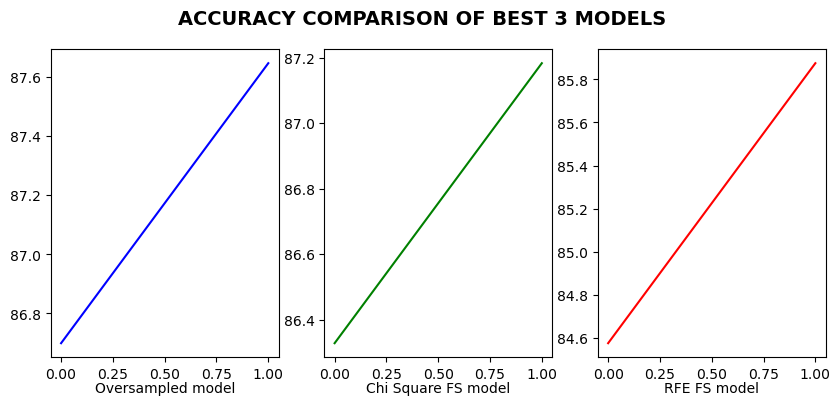

In [229]:
import matplotlib.pyplot as plt

fig, (ax1, ax2,ax3) = plt.subplots(nrows=1, ncols=3, figsize=(10, 4))
ax1.plot(l1, color='blue') #Subplot for oversampled Random forest & xg boost accuracy
ax2.plot(l2, color='green') #Subplot for feature selected(chi square) Random forest & xg boost accuracy
ax3.plot(l3, color='red')   #Subplot for Subplot for feature selected (RFE) Random forest & xg boost accuracy


fig.suptitle('ACCURACY COMPARISON OF BEST 3 MODELS \n', fontsize=14, fontweight='bold')
caption = 'Oversampled model'
ax1.text(0.5, -0.1, caption, ha='center', va='center', transform=ax1.transAxes)
caption1 = 'Chi Square FS model'
ax2.text(0.5, -0.1, caption1, ha='center', va='center', transform=ax2.transAxes)
caption2 = 'RFE FS model'
ax3.text(0.5, -0.1, caption2, ha='center', va='center', transform=ax3.transAxes)

# Cross validation(K-Fold)

In [230]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

#--------------------------------------------------------------------------
#kfold:- 

from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier  # Replace with your specific model
import numpy as np

k = 5  # Number of folds
scores = cross_val_score(xgb,xs_te,ys_te, cv=k, scoring='accuracy')  # Replace x and y with your dataset


# Print the cross-validation scores
print("Cross-Validation Scores:", scores)

# Calculate and print the mean and standard deviation of the scores
mean_accuracy = np.mean(scores)
std_accuracy = np.std(scores)
print("Mean Accuracy:", mean_accuracy)
print("Standard Deviation of Accuracy:", std_accuracy)


Cross-Validation Scores: [0.86972194 0.85368367 0.84080371 0.85780526 0.85935085]
Mean Accuracy: 0.8562730837778311
Standard Deviation of Accuracy: 0.009366946566989713


# CONCLUSION



- **Accuracy Scores**: The results of our **k-fold cross-validation** process indicate that our model consistently performs well across different parts of the dataset, with accuracy scores ranging from **0.8408** to **0.8697**.
  
- **Mean Accuracy**: The **mean accuracy**, around **0.8563**, represents the average performance of our model. It's a simple yet powerful metric that indicates our model's reliability in making accurate predictions.
  
- **Stability**: The **standard deviation of accuracy**, approximately **0.0094**, tells us that our model's performance remains stable across different folds of the data. This stability is like a safety net, ensuring that our model doesn't get swayed by variations in the training data.

In summary, project has demonstrated the robustness of our model through **cross-validation**, with **accuracy scores** ranging from **0.8408 to 0.8697**, an **average accuracy** of **0.8563**, and a **low standard deviation** of approximately **0.0094**. These results provide us with confidence in our model's performance, though it's important to remember that real-world challenges may bring new complexities.